# Análise de Salários 

## Área - Ciências de Dados (Tecnologia)

## Análise de Dados
### Jonatha Rodrigues T. Vaz



# Iniciando

## Importações de Bibliotecas, Leitura e Carregamento do Arquivo de Salários para Análise.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import sketch
import jinja2

import os
for dirname, _, filenames in os.walk('ds_salaries.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.width', 200)

### Carregando o Arquivo, Armazenando em uma Variável e Visualizando Brevemente

In [2]:
df_salaries = pd.read_csv('ds_salaries.csv')
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Executando comando correspondente ao Número de Colunas e Linhas.

In [4]:
df_salaries.shape

(3755, 11)

### Executando comando para obter Informações número de colunas, rótulos de coluna, tipos de dados de coluna, uso de memória, índice de intervalo e o número de células em cada coluna (valores não nulos)

In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Executando comando para Obter Ordenação do Dados e seus Valores Númericos, estatísticas descritivas, média, desvio padrão, máximo, mínimo, tendências centrais e forma da distribuição

In [6]:
df_salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


### Executando comando para Visualizar em um Gráfico Informações do Avanço do Aumento de Salários por Ano 

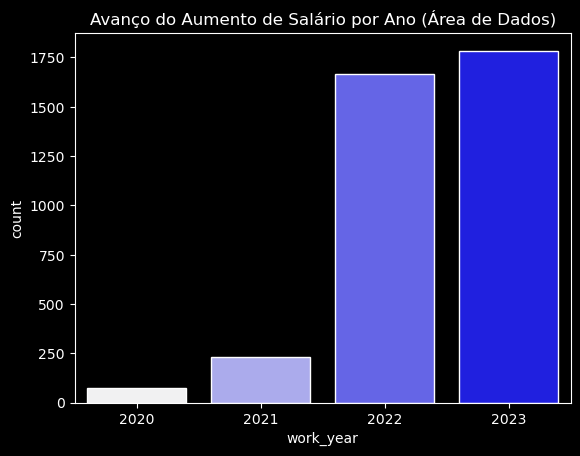

In [35]:
plt.style.use('dark_background')
sns.countplot(x=df_salaries['work_year'], palette = "light:b", edgecolor='white')
plt.title('Avanço do Aumento de Salário por Ano (Área de Dados)', fontsize = 12)
plt.show()

### Visualizando em um Gráfico o Cargo de Maior para o Menor na Área de Dados.

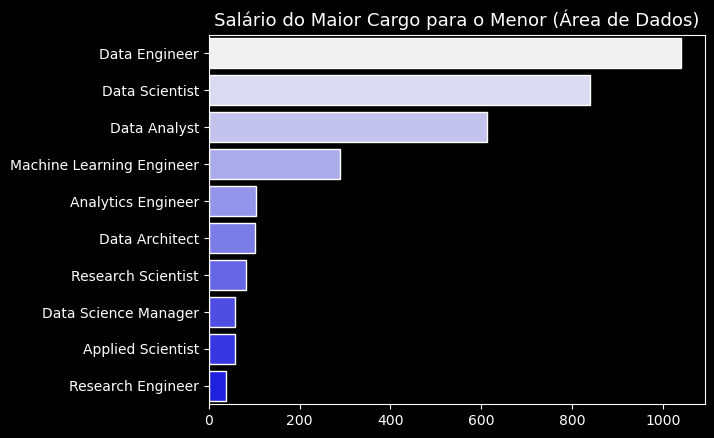

In [36]:
job_count = df_salaries['job_title'].value_counts().nlargest(10)
sns.barplot(x=job_count.values, y=job_count.index, orient='h', palette = 'light:b', edgecolor='white')
plt.title('Salário do Maior Cargo para o Menor (Área de Dados)', fontsize = 13)
plt.show();

## Visualizando em um Gráfico o Salário de acordo com o Nível de Experiencia na Área de Dados

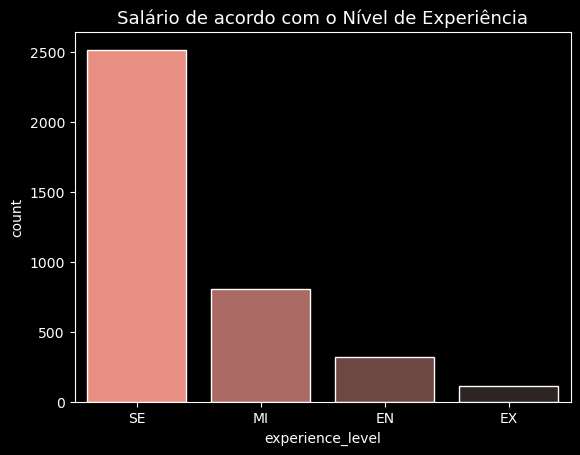

In [66]:
sns.countplot(x=df_salaries['experience_level'], palette = 'dark:salmon_r', edgecolor='white')
plt.title('Salário de acordo com o Nível de Experiência', fontsize = 13)
plt.show()

## Análisando o Tipo de Emprego na Área de Dados 

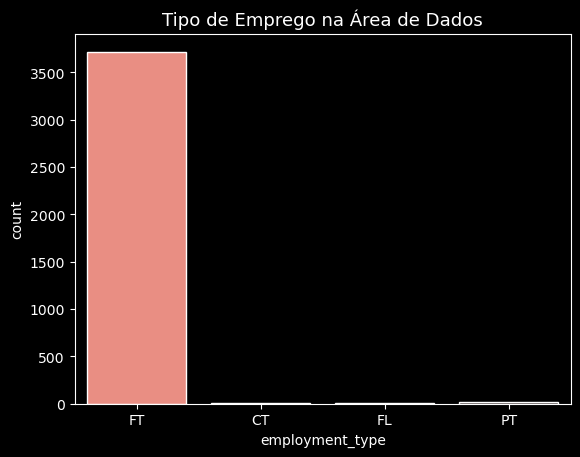

In [65]:
sns.countplot(x=df_salaries['employment_type'], palette = 'dark:salmon_r', edgecolor='white')
plt.title('Tipo de Emprego na Área de Dados', fontsize = 13)
plt.show();

## Análisando a Maior Predominancia e Locação dos Profissionais da Área de Dados

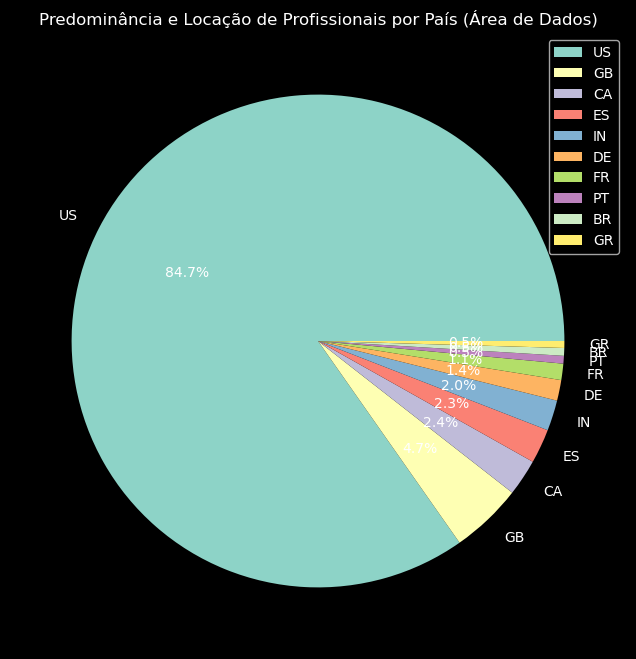

In [55]:
import plotly.express as px
residence_count = df_salaries['employee_residence'].value_counts().nlargest(10)

residence_count.plot(kind='pie', autopct='%.1f%%', figsize=(9, 8))
plt.title('Predominância e Locação de Profissionais por País (Área de Dados)')
plt.ylabel('')
plt.legend()
plt.show();

## Visualizando em um Gráfico qual é a Moeda usada para os Salários da Área de Dados

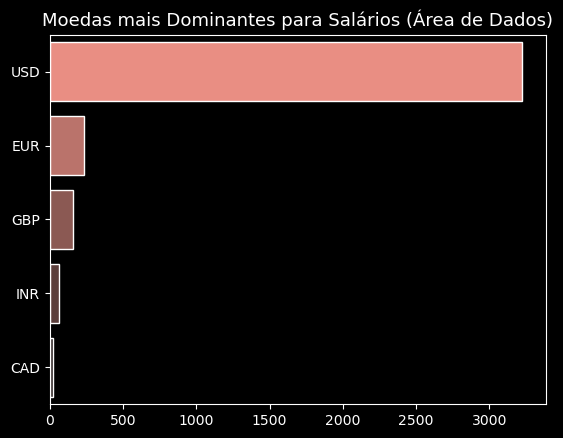

In [90]:
currency_count = df_salaries['salary_currency'].value_counts().nlargest(5)
sns.barplot(x=currency_count.values, y=currency_count.index, orient='h', palette = 'dark:salmon_r', edgecolor='white')
plt.title('Moedas mais Dominantes para Salários (Área de Dados)', fontsize=13)
plt.show();

## Visualizando a Relação entre as Linhas e Colunas

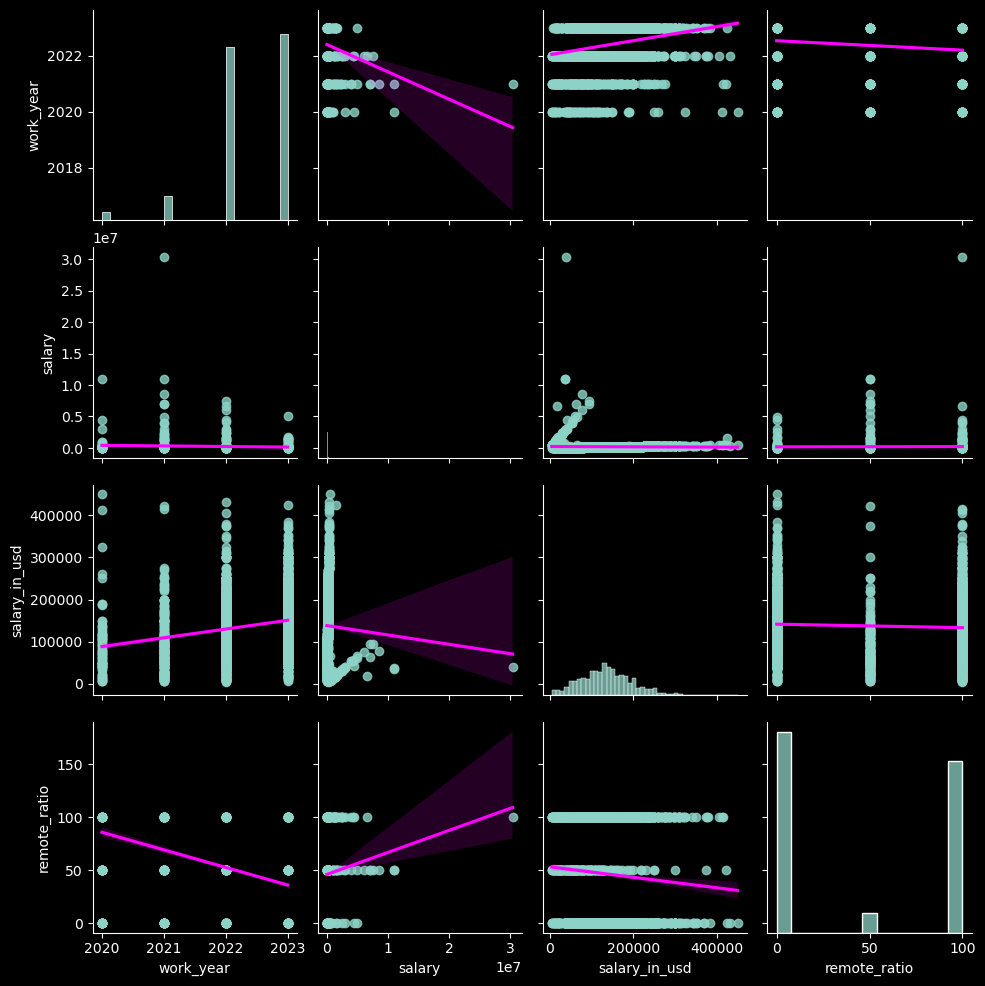

In [93]:
plot_kws = {'line_kws': {'color': '#FF00FF'}}
sns.pairplot(df_salaries, kind='reg', plot_kws=plot_kws)
plt.show()

## Visualizando as Moedas mais usadas para Salários na Área de Dados

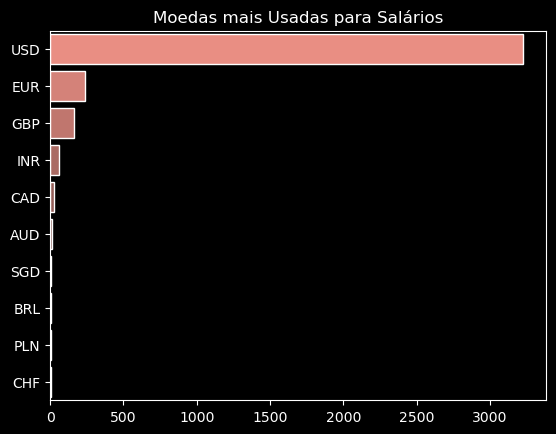

In [89]:
plt.style.use('dark_background')

salary_ccrr = df_salaries['salary_currency'].value_counts().nlargest(10)

sns.barplot(x=salary_ccrr.values, y=salary_ccrr.index, orient='h', palette = "dark:salmon_r", edgecolor='white')
plt.title('Moedas mais Usadas para Salários', fontsize = 12)
plt.show()

# Análise Final :

### Em Resumo, o que definirá o Salário de um Profissional de Dados (Ciêntista/Analista de Dados) será sua Experiencia na Área, juntamente com o Cargo que Atua. A tendencia é que, quanto maior seu tempo na Area, maior será seu Salário em Relação aos anos e experiencias de Trabalho.